<a href="https://colab.research.google.com/github/SurekhaBerlin/Financial-Cash-Flow-Dashboard/blob/main/FinancialCashFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preparation

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statistics

In [ ]:
# Load the Excel file
excel_file = '/content/DataBase.xlsx'

# Create a Pandas ExcelFile object using the correct variable
xls = pd.ExcelFile(excel_file)
df1 = pd.read_excel(xls, 'Chart Of Accounts')

# Concatenate all dataframes
df_concat = pd.concat([df1], ignore_index=True)

# Write to CSV file
df_concat.to_csv('AccountsChart.csv', index=False)

In [ ]:
# Load the Excel file
excel_file = '/content/DataBase.xlsx'

# Create a Pandas ExcelFile object using the correct variable
xls = pd.ExcelFile(excel_file)
df2 = pd.read_excel(xls, 'Payments')

# Concatenate all dataframes
df_concat = pd.concat([df2], ignore_index=True)

# Write to CSV file
df_concat.to_csv('Payments.csv', index=False)

In [ ]:
# Load the Excel file
excel_file = '/content/DataBase.xlsx'

# Create a Pandas ExcelFile object using the correct variable
xls = pd.ExcelFile(excel_file)
df3 = pd.read_excel(xls, 'Income')

# Concatenate all dataframes
df_concat = pd.concat([df3], ignore_index=True)

# Write to CSV file
df_concat.to_csv('Income.csv', index=False)

## Data Overview


In [ ]:
accountschart = pd.read_csv("/content/AccountsChart.csv")

In [ ]:
payments = pd.read_csv("/content/Payments.csv")

In [ ]:
income = pd.read_csv("/content/Income.csv")

In [ ]:
accountschart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Account ID      137 non-null    int64 
 1   Category        137 non-null    object
 2   Sub Category    137 non-null    object
 3   Groups          137 non-null    object
 4   Cash Flow Type  137 non-null    object
 5   Type            137 non-null    object
dtypes: int64(1), object(5)
memory usage: 6.5+ KB


In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Issue Date        20052 non-null  object 
 1   Due Date          20052 non-null  object 
 2   Settlement Date   20052 non-null  object 
 3   Chart Account ID  20052 non-null  int64  
 4   Provider          20052 non-null  object 
 5   UF                20052 non-null  object 
 6   Amount Paid       20052 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14671 entries, 0 to 14670
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Issue Date        14671 non-null  object 
 1   Due Date          14671 non-null  object 
 2   Settlement Date   14671 non-null  object 
 3   Chart Account ID  14671 non-null  int64  
 4   UF                14671 non-null  object 
 5   Customer          14671 non-null  object 
 6   Amount Received   14671 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 802.4+ KB


From the info of the 3 files its clear it dose'nt have any null value

In [ ]:
accountschart.shape

(137, 6)

In [ ]:
accountschart.describe()

,Account ID
count,137.000000
mean,5964.335766
std,1475.540839
min,1.000000
25%,6105.000000
50%,6310.000000
75%,6801.000000
max,7013.000000


In [ ]:
accountschart.columns.values

array(['Account ID', 'Category', 'Sub Category', 'Groups',
       'Cash Flow Type', 'Type'], dtype=object)

In [ ]:
payments.shape

(20052, 7)

In [ ]:
payments.describe()

,Chart Account ID,Amount Paid
count,20052.000000,20052.000000
mean,6276.000349,3566.200249
std,877.102101,11815.116802
min,6.000000,0.010000
25%,6108.000000,227.232500
50%,6208.000000,976.720000
75%,6801.000000,2878.625000
max,7013.000000,638443.670000


In [ ]:
payments.columns.values

array(['Issue Date', 'Due Date', 'Settlement Date', 'Chart Account ID',
       'Provider', 'UF', 'Amount Paid'], dtype=object)

In [ ]:
income.shape

(14671, 7)

In [ ]:
income.describe()

,Chart Account ID,Amount Received
count,14671.000000,14671.000000
mean,5004.230591,4146.476006
std,11.943513,23639.438854
min,5001.000000,0.000000
25%,5003.000000,514.805000
50%,5003.000000,949.270000
75%,5003.000000,1899.735000
max,5111.000000,895806.780000


In [ ]:
income.columns.values

array(['Issue Date', 'Due Date', 'Settlement Date', 'Chart Account ID',
       'UF', 'Customer', 'Amount Received'], dtype=object)

About the dataset

*   The dataset consists of 3 csv files accountschart,payments and income.
*   Accountschart has 137 data
*   Payments has 20052 data
*   Income has 14671 data
*   There are no null values


## DATA CLEANING
Handling Missing Value

In [ ]:
accountschart.isnull().sum()

Account ID        0
Category          0
Sub Category      0
Groups            0
Cash Flow Type    0
Type              0
dtype: int64

In [ ]:
payments.isnull().sum()

Issue Date          0
Due Date            0
Settlement Date     0
Chart Account ID    0
Provider            0
UF                  0
Amount Paid         0
dtype: int64

In [ ]:
income.isnull().sum()

Issue Date          0
Due Date            0
Settlement Date     0
Chart Account ID    0
UF                  0
Customer            0
Amount Received     0
dtype: int64

There are no any null values in any of the 3 csv files


Duplicated Data

In [ ]:
accountschart.duplicated().sum()

0

In [ ]:
payments.duplicated().sum()

1

In [ ]:
income.duplicated().sum()

6

Removing the duplicated value

In [ ]:
payments = payments.drop_duplicates()

In [ ]:
payments.duplicated().sum()

0

In [ ]:
income =income.drop_duplicates()

In [ ]:
income.duplicated().sum()

0

## DATA WRANGLING
Leading and Trailing Space

*   Using strip fn removing unwanted spaces from columns name

*   Fix the column name by trimming the white space in the beginning and the end



In [ ]:
dataframes = [accountschart,payments, income]

for df in dataframes:
  df.columns = df.columns.str.strip()

In [ ]:
accountschart.columns

Index(['Account ID', 'Category', 'Sub Category', 'Groups', 'Cash Flow Type',
       'Type'],
      dtype='object')

In [ ]:
payments.columns

Index(['Issue Date', 'Due Date', 'Settlement Date', 'Chart Account ID',
       'Provider', 'UF', 'Amount Paid'],
      dtype='object')

In [ ]:
income.columns

Index(['Issue Date', 'Due Date', 'Settlement Date', 'Chart Account ID', 'UF',
       'Customer', 'Amount Received'],
      dtype='object')

## FEATURE ENGINEERING :
Change the datatype of date feature columns

In [ ]:
# Convert date columns to datetime format
payments['Issue Date'] = pd.to_datetime(payments['Issue Date'])
payments['Due Date'] = pd.to_datetime(payments['Due Date'])
payments['Settlement Date'] = pd.to_datetime(payments['Settlement Date'])
income['Issue Date'] = pd.to_datetime(income['Issue Date'])
income['Due Date'] = pd.to_datetime(income['Due Date'])
income['Settlement Date'] = pd.to_datetime(income['Settlement Date'])

<ipython-input-34-a1789a03846f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payments['Issue Date'] = pd.to_datetime(payments['Issue Date'])
<ipython-input-34-a1789a03846f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payments['Due Date'] = pd.to_datetime(payments['Due Date'])
<ipython-input-34-a1789a03846f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20051 entries, 0 to 20051
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Issue Date        20051 non-null  datetime64[ns]
 1   Due Date          20051 non-null  datetime64[ns]
 2   Settlement Date   20051 non-null  datetime64[ns]
 3   Chart Account ID  20051 non-null  int64         
 4   Provider          20051 non-null  object        
 5   UF                20051 non-null  object        
 6   Amount Paid       20051 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14665 entries, 0 to 14670
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Issue Date        14665 non-null  datetime64[ns]
 1   Due Date          14665 non-null  datetime64[ns]
 2   Settlement Date   14665 non-null  datetime64[ns]
 3   Chart Account ID  14665 non-null  int64         
 4   UF                14665 non-null  object        
 5   Customer          14665 non-null  object        
 6   Amount Received   14665 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(2)
memory usage: 916.6+ KB


Extracting the Year ,Month and Day from datetime format

In [ ]:
payments.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,Provider,UF,Amount Paid
0,2017-06-16,2017-08-25,2017-08-25,6105,Provider 1,SP,810.52
1,2017-06-16,2017-08-11,2017-08-11,6105,Provider 1,SP,969.39
2,2017-06-16,2017-07-28,2017-07-28,6105,Provider 1,SP,950.57
3,2017-06-16,2017-07-21,2017-07-21,6105,Provider 1,SP,2348.31
4,2017-06-16,2017-07-14,2017-07-14,6105,Provider 1,SP,836.49


In [ ]:
# Extract year, month, day for Issue Date
# Convert 'Settlement Date' to datetime format
# Extract year, month, day for Settlement Date
payments['Settlement Year'] = payments['Settlement Date'].dt.year
payments['Settlement Month'] = payments['Settlement Date'].dt.month
payments['Settlement Day'] = payments['Settlement Date'].dt.day


payments['Due Year'] = payments['Due Date'].dt.year
payments['Due Month'] = payments['Due Date'].dt.month
payments['Due Day'] = payments['Due Date'].dt.day



In [ ]:
payments.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,Provider,UF,Amount Paid,Settlement Year,Settlement Month,Settlement Day,Due Year,Due Month,Due Day
0,2017-06-16,2017-08-25,2017-08-25,6105,Provider 1,SP,810.52,2017,8,25,2017,8,25
1,2017-06-16,2017-08-11,2017-08-11,6105,Provider 1,SP,969.39,2017,8,11,2017,8,11
2,2017-06-16,2017-07-28,2017-07-28,6105,Provider 1,SP,950.57,2017,7,28,2017,7,28
3,2017-06-16,2017-07-21,2017-07-21,6105,Provider 1,SP,2348.31,2017,7,21,2017,7,21
4,2017-06-16,2017-07-14,2017-07-14,6105,Provider 1,SP,836.49,2017,7,14,2017,7,14


In [ ]:
income['Settlement Year'] = income['Settlement Date'].dt.year
income['Settlement Month'] = income['Settlement Date'].dt.month
income['Settlement Day'] = income['Settlement Date'].dt.day


income['Due Year'] = income['Due Date'].dt.year
income['Due Month'] = income['Due Date'].dt.month
income['Due Day'] = income['Due Date'].dt.day

In [ ]:
income.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,UF,Customer,Amount Received,Settlement Year,Settlement Month,Settlement Day,Due Year,Due Month,Due Day
0,2017-01-02,2017-01-30,2017-01-31,5003,RJ,Customer 1,787.13,2017,1,31,2017,1,30
1,2017-01-02,2017-02-01,2017-02-02,5003,RJ,Customer 1,655.13,2017,2,2,2017,2,1
2,2017-01-02,2017-02-06,2017-02-07,5003,RJ,Customer 1,354.72,2017,2,7,2017,2,6
3,2017-01-03,2017-01-03,2017-01-04,5003,SP,Customer 2,2597.01,2017,1,4,2017,1,3
4,2017-01-03,2017-02-07,2017-02-08,5003,SP,Customer 3,785.65,2017,2,8,2017,2,7



Histogram to understant the distribution


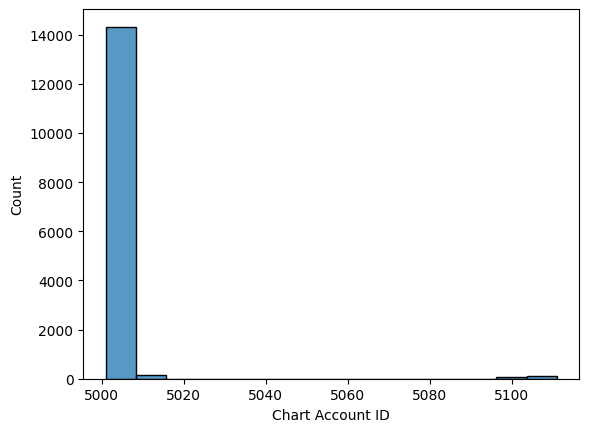

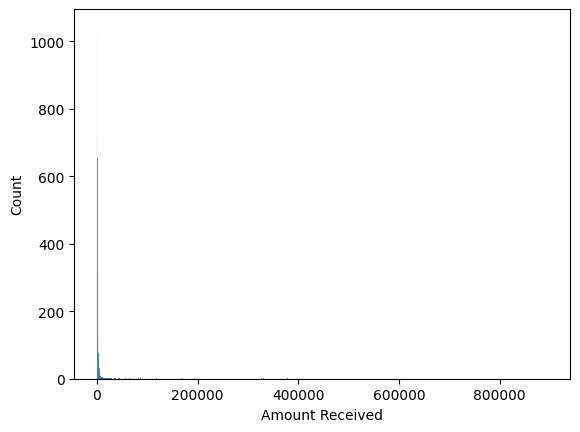

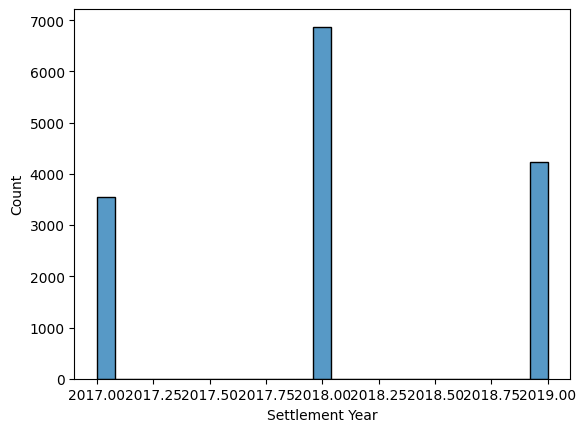

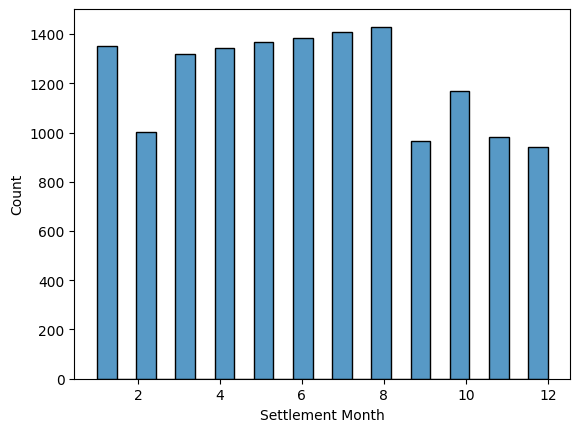

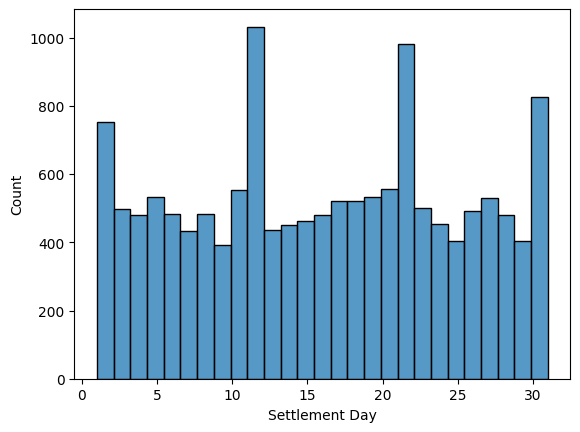

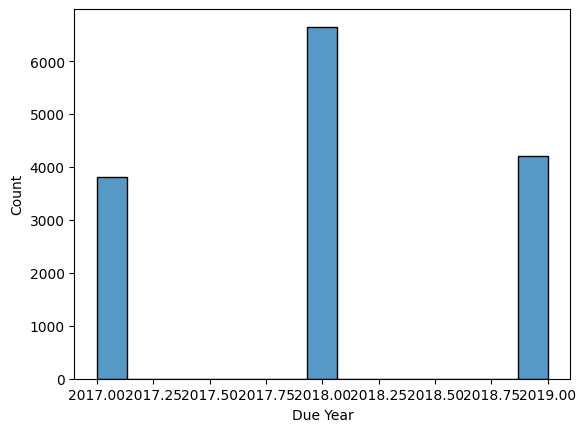

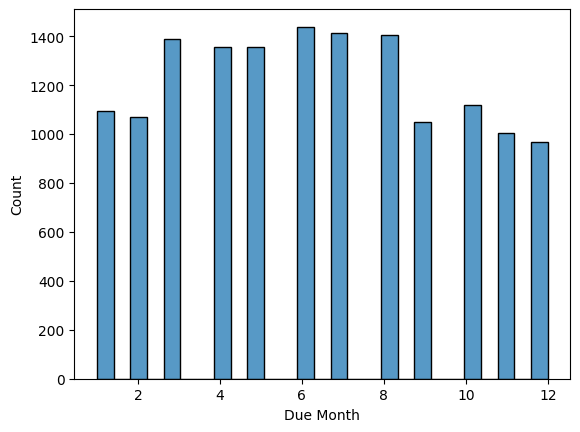

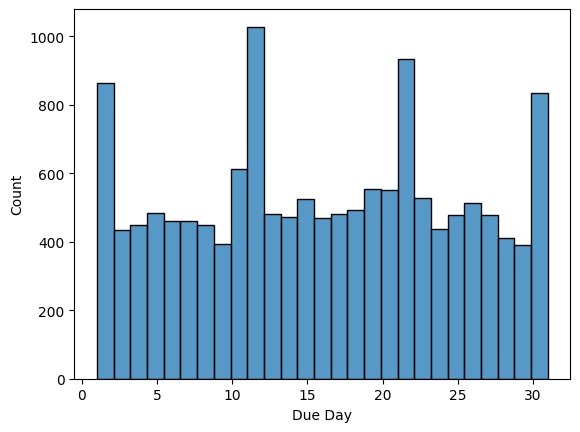

In [ ]:
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data =df,x=i)
    plt.show()

## Outlier Treatment


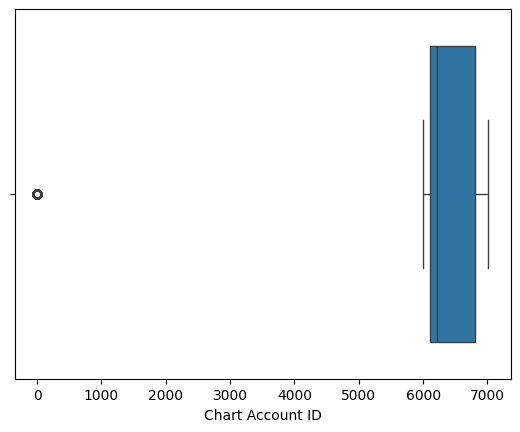

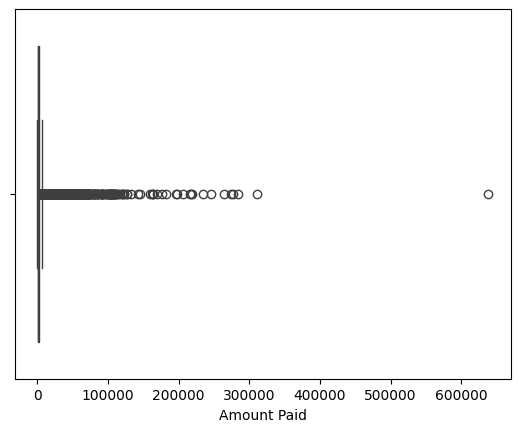

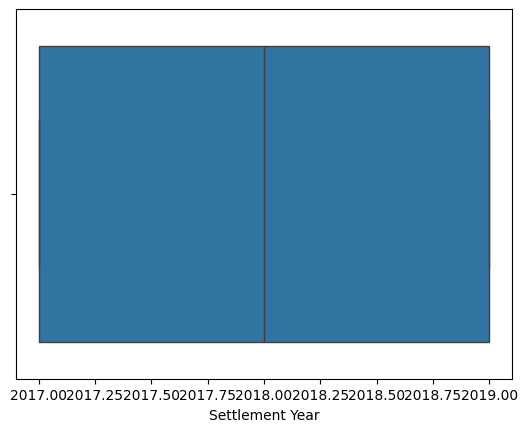

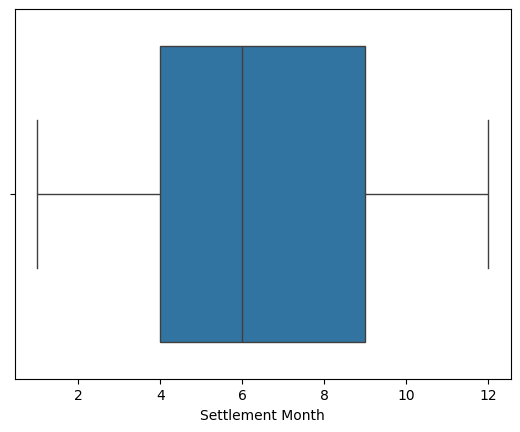

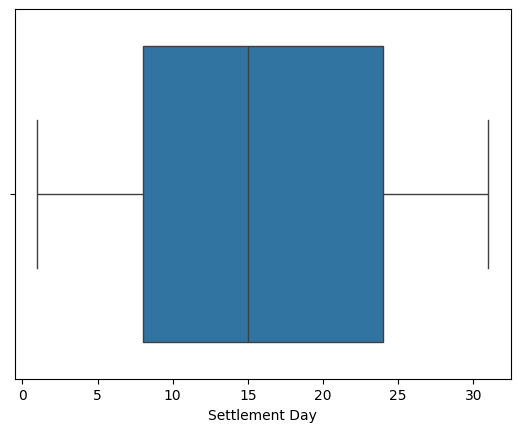

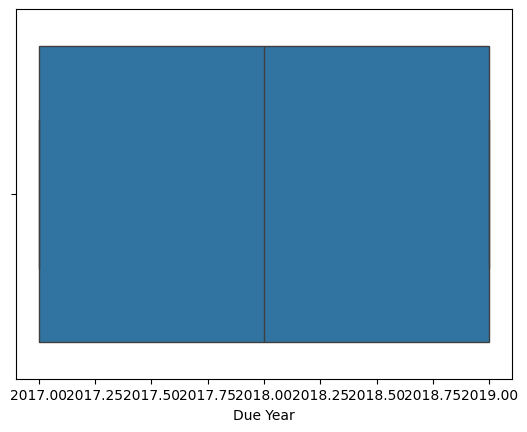

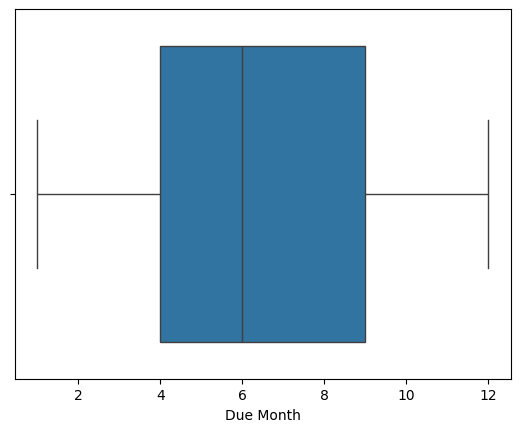

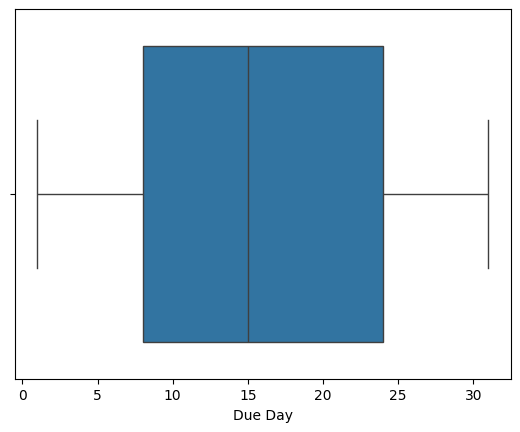

In [ ]:
#Boxplot to identify the outlier
import warnings
warnings.filterwarnings("ignore")
for i in payments.select_dtypes(include = "number").columns:
    sns.boxplot(data = payments,x=i)
    plt.show()

In [ ]:
def find_anomalies(payments):
  anomalies = []

  random_data_std = statistics.stdev(payments)
  random_data_mean = statistics.mean(payments)

  anomaly_cut_off = random_data_std*3
  lower_limit = random_data_mean - anomaly_cut_off
  upper_limit = random_data_mean + anomaly_cut_off

  for outlier in payments:
    if outlier > upper_limit or outlier < lower_limit:
      anomalies.append(outlier)
  return anomalies



In [ ]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20051 entries, 0 to 20051
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Issue Date        20051 non-null  datetime64[ns]
 1   Due Date          20051 non-null  datetime64[ns]
 2   Settlement Date   20051 non-null  datetime64[ns]
 3   Chart Account ID  20051 non-null  int64         
 4   Provider          20051 non-null  object        
 5   UF                20051 non-null  object        
 6   Amount Paid       20051 non-null  float64       
 7   Settlement Year   20051 non-null  int32         
 8   Settlement Month  20051 non-null  int32         
 9   Settlement Day    20051 non-null  int32         
 10  Due Year          20051 non-null  int32         
 11  Due Month         20051 non-null  int32         
 12  Due Day           20051 non-null  int32         
dtypes: datetime64[ns](3), float64(1), int32(6), int64(1), object(2)
memory usage: 1.7

In [ ]:
payments_new = find_anomalies(payments['Amount Paid'])

In [ ]:
payments['Amount Paid'].skew()

17.02972909682975

In [ ]:
len(payments)

20051

In [ ]:
len(payments_new)

246

In [ ]:
payments['Amount Paid_transformed'] = np.log(payments['Amount Paid'])

In [ ]:
payments['Amount Paid_transformed'].skew()

nan

<Axes: xlabel='Amount Paid', ylabel='Density'>

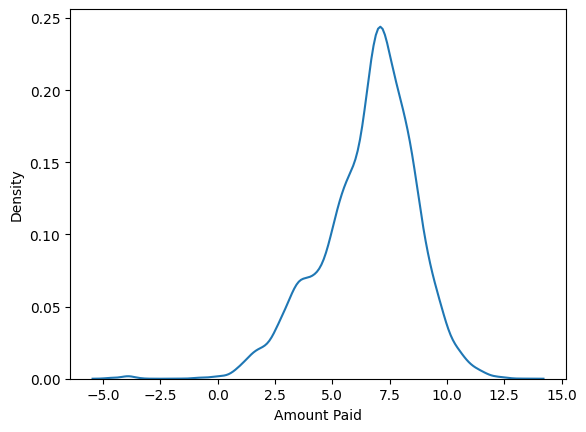

In [ ]:
import seaborn as sns

sns.kdeplot(payments['Amount Paid'])


In [ ]:
payments.head()

,Issue Date,Due Date,Settlement Date,Chart Account ID,Provider,UF,Amount Paid,Settlement Year,Settlement Month,Settlement Day,Due Year,Due Month,Due Day,Amount Paid_transformed,Amount Paid_transformed_double
0,2017-06-16,2017-08-25,2017-08-25,6105,Provider 1,SP,6.697676,2017,8,25,2017,8,25,1.901761,1.901761
1,2017-06-16,2017-08-11,2017-08-11,6105,Provider 1,SP,6.876667,2017,8,11,2017,8,11,1.928134,1.928134
2,2017-06-16,2017-07-28,2017-07-28,6105,Provider 1,SP,6.857062,2017,7,28,2017,7,28,1.925279,1.925279
3,2017-06-16,2017-07-21,2017-07-21,6105,Provider 1,SP,7.761451,2017,7,21,2017,7,21,2.049169,2.049169
4,2017-06-16,2017-07-14,2017-07-14,6105,Provider 1,SP,6.729215,2017,7,14,2017,7,14,1.906458,1.906458
